In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Class 8: Introduction to Business Cycle Data

The *business cycle* is the fluctuation of many macroeconomic quantities that last for about 1.5 to 8 years. Colloquially, the term refers to the alternating periods of expansion and contraction in the macroeconomy. Business cycle fluctuations are costly because they are associated with misallocations of capital and labor. Recessions are particularly painful for workers that become unemployed and for the families of workers who become unemployed. The costs of the business cycle have driven research into understanding the cause of the cycle. 

The collective set of theories to explain the cycle is called *business cycle theory* and eventually we'll study and critique two competing theoretical perspectives. However, before we approach the theory, we should first uncover some empirical facts about the business cycle that models should be able to explain.

In this lecture, we will:

1. Visualize the difference between the trend and cyclical components of GDP, consumption, investent, and hours.
2. Compute the percent deviations from trend of GDP, consumption, investent, and hours.
3. Compute summary statistics about the business cycle that models of the cycle should be able to explain.

## Data

The file `rbc_data_actual_trend.csv`, available at https://raw.githubusercontent.com/letsgoexploring/computational-macroeconomics/master/Data/Csv/rbc_data_actual_trend.csv, contains actual and trend data for real GDP per capita, real consumption per capita, real investment per capita, real physical capital per capita, TFP, and hours per capita at quarterly frequency. The GDP, consumption, investment, and capital data are in terms of 2012 dollars. Hours is measured as an index with the value in October 2012 set to 100. All of the data are *real* quantities. That is, there are no *nominal* quantities like money or inflation or a nominal interest rate. The reason is that the first theory that we will encounter is called *real business cycle* or RBC theory and, in that theory, there is no place for nominal quantities. RBC theory seeks to explain fluctuations in real quantities as being primarily due to TFP shocks; i.e., shocks to the production function.

In [2]:
# Read business_cycle_data_actual_trend.csv into a Pandas DataFrame with the first column set as the index and parse_dates=True
df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/computational-macroeconomics/master/Data/Csv/rbc_data_actual_trend.csv',index_col=0,parse_dates=True)

# Print the last five rows of the data
df.tail()

,gdp,gdp_trend,consumption,consumption_trend,investment,investment_trend,hours,hours_trend,capital,capital_trend,tfp,tfp_trend
date,,,,,,,,,,,,
2022-04-01,82.324442,82.246223,56.125677,55.764176,15.273074,14.836408,100.205187,98.688701,96.395301,96.333780,28.743500,29.008726
2022-07-01,82.712095,82.568594,56.269153,56.035244,15.033227,14.900029,100.618046,98.861809,96.933507,96.795776,28.745699,29.040603
2022-10-01,83.076396,82.891852,56.363988,56.307483,15.087918,14.962838,100.743085,99.039916,97.387061,97.259153,28.801913,29.071574
2023-01-01,83.092935,83.216072,56.615749,56.580915,14.644915,15.025212,100.843929,99.220438,97.505364,97.724182,28.776689,29.102131
2023-04-01,83.359726,83.541447,56.734387,56.855599,14.724291,15.087617,100.278046,99.401834,97.846271,98.191218,28.939499,29.132600


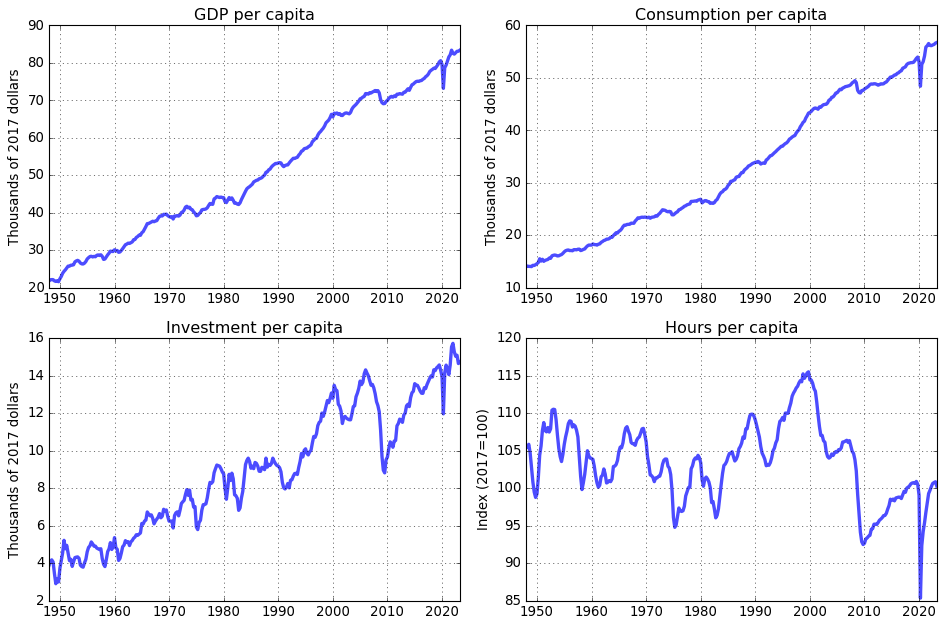

In [3]:
# Construct a 2x2 grid of plots of GDP, consumption, investment, and hours. CELL PROVIDED

# Load metadata for dataset and set base_year
pwt_metadata = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/computational-macroeconomics/master/Data/Csv/pwt_metadata.csv',index_col=0)['Values']
base_year = pwt_metadata['base_year']

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(df.gdp,'-',lw=3,alpha = 0.7)
ax1.grid()
ax1.set_title('GDP per capita')
ax1.set_ylabel('Thousands of '+base_year+' dollars')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(df.consumption,'-',lw=3,alpha = 0.7)
ax2.grid()
ax2.set_title('Consumption per capita')
ax2.set_ylabel('Thousands of '+base_year+' dollars')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(df.investment,'-',lw=3,alpha = 0.7)
ax3.grid()
ax3.set_title('Investment per capita')
ax3.set_ylabel('Thousands of '+base_year+' dollars')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(df.hours,'-',lw=3,alpha = 0.7)
ax4.grid()
ax4.set_title('Hours per capita')
ax4.set_ylabel('Index ('+base_year+'=100)')

fig.tight_layout()

## Cycles and Trends

Business cycle theory is tested against data. However, data on the business cycle data is not readily available and must be constructed. A time series $X_t$ can be decomposed into a trend component $X_t^{trend}$ and a cyclical component $X_t^{cycle}$ such that:

\begin{align}
X_t & = X_t^{trend} + X_t^{cycle}. \tag{1}
\end{align}

In equation (1), $X_t^{trend}$ is the long-run value about which $X_t$ fluctuates. $X^{cycle}_t$ is the amount by which $X_t$ excedes its trend. The process for decomposing a series into trend and cyclical components is called *filtering* and is more technical than we want to get into. We'll take for granted that such procedures exist.

Often times, it's useful to express the cyclical component of a time series as the percent deviation of the series from trend (divided by 100):

\begin{align}
\hat{x}_t & = \frac{X_t-X_t^{trend}}{X_t^{trend}} = \frac{X_t^{cycle}}{X_t^{trend}}
\end{align} 

Note that the percent deviation of the series from trend (divided by 100) is approximately equal to the difference between the (natural) log of the series and the log of the trend:

\begin{align}
\frac{X_t-X_t^{trend}}{X_t^{trend}} \approx \log\left(X_t\right) - \log\left(X_t^{trend}\right) 
\end{align}

This last fact can make computation a little easier and, in some cases, helps to reconcile theory with data.

### GDP

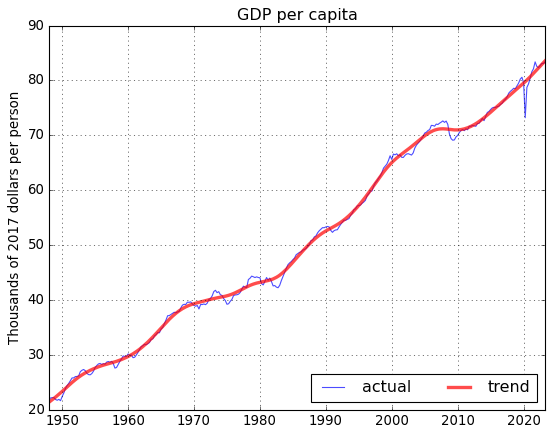

In [4]:
# Construct a plot of real GDP with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df.gdp,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.gdp_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.ylabel('Thousands of '+base_year+' dollars per person')
plt.title('GDP per capita')
plt.legend(loc='lower right',ncol=2)
plt.grid()

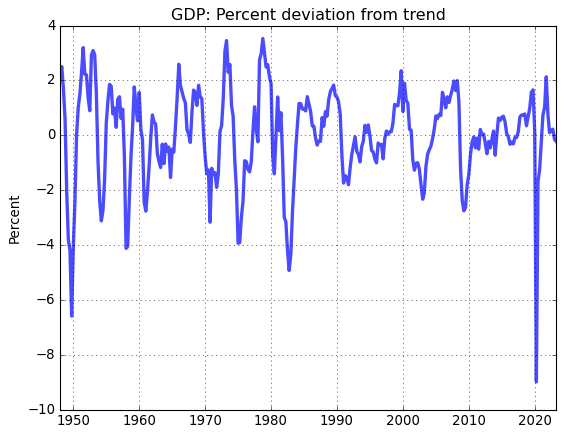

In [5]:
# Create a new column called gdp_cycle_dev equal to the percent deviation of actual 
# GDP relative to trend GDP (divided by 100):
df['gdp_cycle_dev'] = (df['gdp'] - df['gdp_trend'])/df['gdp']

# Plot the percent deviation of GDP from its trend
plt.plot(df.gdp_cycle_dev*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('GDP: Percent deviation from trend')
plt.grid()

### Consumption, Investment, and Hours

In [6]:
# Create a new column called cons_cycle_dev, invest_cycle_dev, and hours_cycle_dev equal to the log difference between 
# the actual and trend values of the respective series:
df['cons_cycle_dev'] = (df['consumption'] - df['consumption_trend'])/df['consumption_trend']
df['invest_cycle_dev'] = (df['investment'] - df['investment_trend'])/df['investment_trend']
df['hours_cycle_dev'] = (df['hours'] - df['hours_trend'])/df['hours_trend']


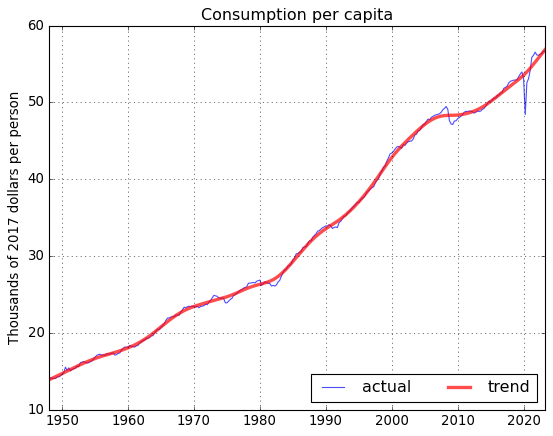

In [7]:
# Construct a plot of consumption with its trend
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df.consumption,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.consumption_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.ylabel('Thousands of '+base_year+' dollars per person')
plt.title('Consumption per capita')
plt.legend(loc='lower right',ncol=2)
plt.grid()

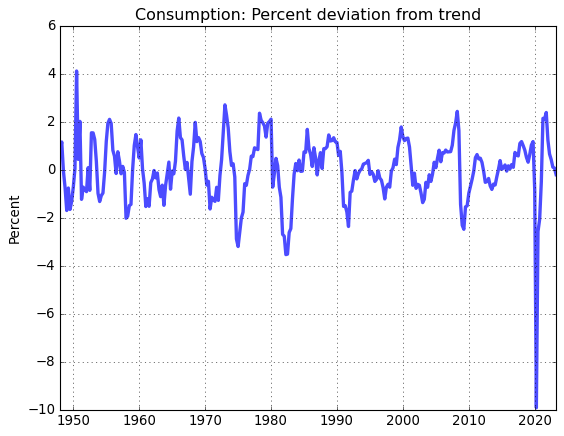

In [8]:
# Plot the percent deviation of consumption from its trend
plt.plot(df.cons_cycle_dev*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('Consumption: Percent deviation from trend')
plt.grid()

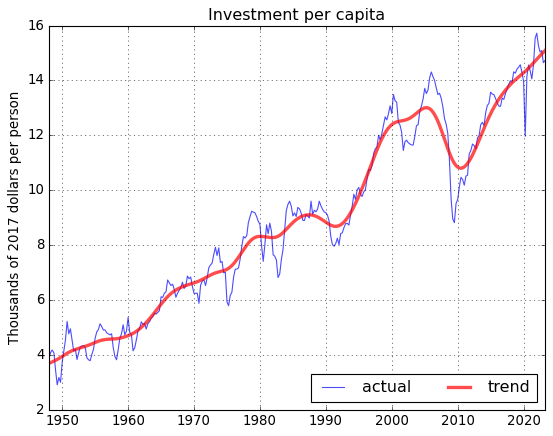

In [9]:
# Construct a plot of investment with its trend
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df.investment,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.investment_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.ylabel('Thousands of '+base_year+' dollars per person')
plt.title('Investment per capita')
plt.legend(loc='lower right',ncol=2)
plt.grid()

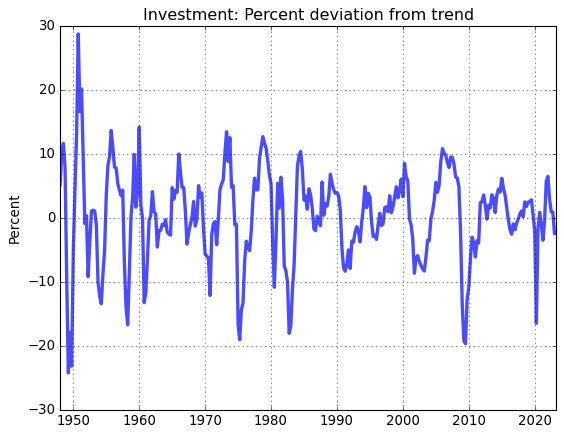

In [10]:
# Plot the percent deviation of investment from its trend
plt.plot(df.invest_cycle_dev*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('Investment: Percent deviation from trend')
plt.grid()

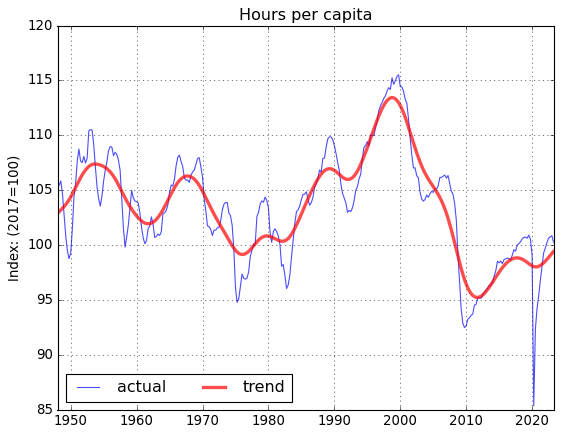

In [11]:
# Construct a plot of hours with its trend
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df.hours,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.hours_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.ylabel('Index: ('+base_year+'=100)')
plt.title('Hours per capita')
plt.legend(loc='lower left',ncol=2)
plt.grid()

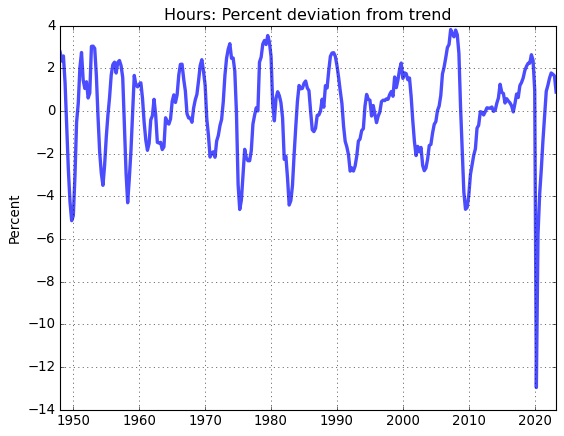

In [12]:
# Plot the percent deviation of hours from its trend
plt.plot(df.hours_cycle_dev*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('Hours: Percent deviation from trend')
plt.grid()

## US Business Cycle Statistics

In [13]:
# Create a new variable called df_cycle that is a DataFrame with columns columns gdp_cycle_dev, cons_cycle_dev, 
# invest_cycle_dev, and hours_cycle_dev from df.
df_cycle = df[['gdp_cycle_dev', 'cons_cycle_dev', 'invest_cycle_dev', 'hours_cycle_dev']]

# Print the first five rows of df_cycle
print(df_cycle.head())

            gdp_cycle_dev  cons_cycle_dev  invest_cycle_dev  hours_cycle_dev
date                                                                        
1948-01-01       0.021681        0.007869          0.051562         0.027529
1948-04-01       0.025041        0.011490          0.100881         0.023371
1948-07-01       0.016947       -0.000561          0.115899         0.025754
1948-10-01       0.005784       -0.007532          0.077659         0.013147
1949-01-01      -0.020790       -0.017068         -0.097979        -0.007094


In [14]:
# Use the DataFrame method .mean() to find the average values of the gdp_cycle_dev, cons_cycle_dev, invest_cycle_dev, 
# and hours_cycle_dev columns
df_cycle.mean()

gdp_cycle_dev      -0.000139
cons_cycle_dev      0.000086
invest_cycle_dev    0.002642
hours_cycle_dev     0.000219
dtype: float64

In [15]:
# Use the DataFrame method .std() to find the standard deviations of the gdp_cycle_dev, cons_cycle_dev, invest_cycle_dev, 
# and hours_cycle_dev columns
df_cycle.std()

gdp_cycle_dev       0.016784
cons_cycle_dev      0.013021
invest_cycle_dev    0.071812
hours_cycle_dev     0.020775
dtype: float64

In [16]:
# Use the DataFrame method .corr() to find the coefficients of correlation among the gdp_cycle_dev, cons_cycle_dev, 
# invest_cycle_dev, and hours_cycle_dev columns
df_cycle.corr()

,gdp_cycle_dev,cons_cycle_dev,invest_cycle_dev,hours_cycle_dev
gdp_cycle_dev,1.000000,0.811565,0.828728,0.867751
cons_cycle_dev,0.811565,1.000000,0.643667,0.743357
invest_cycle_dev,0.828728,0.643667,1.000000,0.744666
hours_cycle_dev,0.867751,0.743357,0.744666,1.000000


**Questions**

1. Which quantity varies the most over the business cycle?
2. Which quantity varies the least over the business cycle?
3. Which quantity is most correlated with GDP over the business cycle?

**Answers**

1. Investment fluctuates the most over the business cycle.<!-- answer -->
2. Consumption fluctuates the least over the business cycle.<!-- answer -->
3. Hours is the quantity that is most correlated with GDP over the cycle. Since the capital stock changes slowly over time, large fluctuations due primarily to large fluctuations in employment.<!-- answer -->

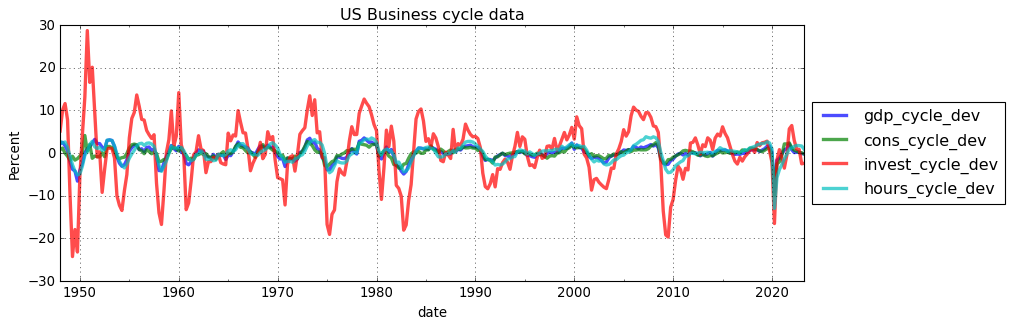

In [17]:
# Plot the cyclical components of GDP, consumption, investment, and hours (all times 100) on the same set of axes
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
(df_cycle*100).plot(ax = ax,legend=False,lw=3,alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Percent')
ax.set_title('US Business cycle data')
ax.grid()